# WEEK 4  - Ganesh Kale

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [27]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Again, I'll load the NSFG pregnancy file and select live births:

In [3]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [4]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x) 

    new_pmf.Normalize()
    return new_pmf

In [5]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

### Exercises 3.1

**Exercise 3.1:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [6]:
resp = nsfg.ReadFemResp()

In [7]:
# all the children under 18 in numkdhh
resp.numkdhh.value_counts()

0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64

In [8]:
# pmf can be calculated using pandas value_counts() method
pmff = (resp.numkdhh.value_counts()/len(resp)).sort_index()
pmff

0    0.466178
1    0.214052
2    0.196258
3    0.087139
4    0.025644
5    0.010729
Name: numkdhh, dtype: float64

In [9]:
# calculate pmf using the function Pmf
pmf = thinkstats2.Pmf(resp.numkdhh, label='kids_under18')

Text(0, 0.5, 'pmf')

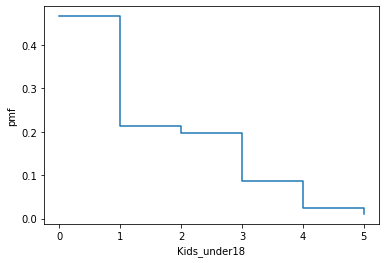

In [26]:
# Plot the step function for numkdhh and pmf

sns.lineplot(x = pmff.keys(), y=pmff, drawstyle='steps-post')
plt.xlabel('Kids_under18')
plt.ylabel('pmf')

In [11]:
# Calculate the biased pmf using BiasPmf function
biased_pmf = BiasPmf(pmf, label='observed')

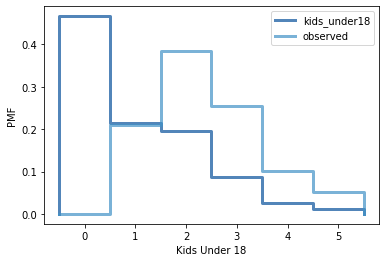

In [12]:
# plot step function for actual vs observed
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Kids Under 18', ylabel='PMF')

In [13]:
# Calcualte the mean of both actual and observed
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


#### From these means we can say, per class size paradox the observed/biased mean is greater than actual

### Exercise 3.2

#### Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [14]:
# function to calculate Mean of PMF distribution

def PmfMean(pmf):
    calc_mean = 0.0
    for x,p in pmf.Items():
        calc_mean = calc_mean + x * p
    return calc_mean

In [15]:
print('Mean calculated by PmfMean: ',PmfMean(pmf))
print('Mean calculated by Mean:    ' ,pmf.Mean())

Mean calculated by PmfMean:  1.024205155043831
Mean calculated by Mean:     1.024205155043831


In [16]:
# function to calculate varianse of PMG distribution

def PmfVar(pmf):
    calc_var = 0.0
    pmf_mean = PmfMean(pmf)
    for x,p in pmf.Items():
        calc_var = calc_var + p * (x-pmf_mean) ** 2
    return calc_var

In [17]:
print('Mean calculated by PmfMean: ',PmfVar(pmf))
print('Mean calculated by Mean:    ' ,pmf.Var())

Mean calculated by PmfMean:  1.4128643263531195
Mean calculated by Mean:     1.4128643263531195


### Exercise 4.1

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [18]:
# my weigth at birth was - 7.12 lb and I'm not first baby
# load the NSFG data for live births and first and others babies

live, firsts, others = first.MakeFrames()

In [19]:
# function to calculate percentile rank

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [20]:
# calculate the cdf for first babies total weigth and other babies

first_baby_cdf = thinkstats2.Cdf(firsts.totalwgt_lb,label = 'first baby')
other_baby_cdf = thinkstats2.Cdf(others.totalwgt_lb,label = 'other baby')

In [21]:
# calculate my birthweigth percentile rank in others

other_baby_cdf.PercentileRank(7.12)

40.17112299465241

### Exercise 4.2:

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [22]:
# generated random numbers 

data = np.random.random(1000)

In [23]:
# calculated pmf of random generated data

pmf = thinkstats2.Pmf(data , label='random')

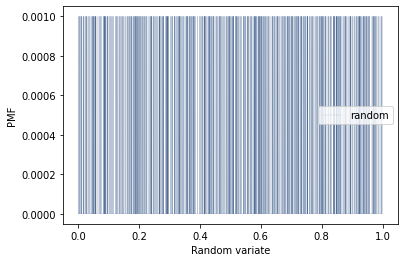

In [24]:
# plotted pmf distribution , it is uniform distribution but it's ery noisy, can not be seen clearly

thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF',loc='right')

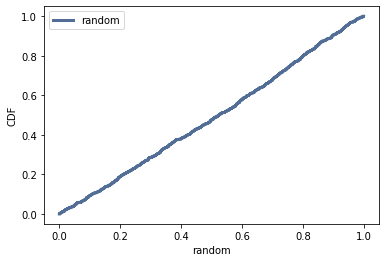

In [25]:
# calculated and plotted cdf for same random distribution and we can seee the straight 
# line,which shows uniform distribution

cdf1 = thinkstats2.Cdf(data, label='random')
thinkplot.Cdf(cdf1)
thinkplot.Config(xlabel='random', ylabel='CDF', loc='upper left')

## END